In [16]:
import pandas as pd #导入pandas包
import numpy as np #导入numpy包
from sklearn.model_selection import train_test_split #导入此包用来进行分割训练集和测试集
from sklearn.metrics import mean_squared_error # 导入此包用来进行计算均方根误差
from sklearn.svm import SVR # 导入支持向量机回归包函数
from sklearn.preprocessing import StandardScaler #导入此包数据特征的处理
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn import svm
import warnings
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [17]:
#导入数据
data = pd.read_excel(r"F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\空气补气速度.xlsx")
# 分离特征值和结果值
data_x = data.iloc[:,0:4]
data_y = data.iloc[:,4:5]

In [18]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42) #设计随机种子数为42

In [19]:
# 特征缩放
scaler = StandardScaler() #创建一个scaler的示例函数
X_train = scaler.fit_transform(X_train) #将训练特征转化为零均值、单位方差
X_test = scaler.transform(X_test)#将测试特征转化为零均值、单位方差

In [63]:
warnings.filterwarnings("ignore")
param_grid = {
    'max_depth': [None, 10, 20,30,50,100,200],
    'min_samples_split': [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'min_samples_leaf': [1, 2, 4,8,16,32,48,64,80],
}# 使用以上超参数组合进行训练

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')# 进行交叉验证
grid_search.fit(X_train, y_train) 
print("最佳参数: ", grid_search.best_params_)
print("最佳分数（负均方误差）: ", grid_search.best_score_)

best_params = grid_search.best_params_ # 此种方法下保存交叉验证后的最优参数解，其格式为字典形式
model = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
model.fit(X_train, y_train) # 对模型进行训练
y_test_pred = model.predict(X_test) # 训练测试集
mse = mean_squared_error(y_test, y_test_pred)
print("均方根误差（MSE）: ", mse)
r2_test = r2_score(y_test, y_test_pred)
print("测试集R平方值: ", r2_test)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("训练集R平方值: ", r2_train)
# 对测试集进行MAE计算
mae_test = mean_absolute_error(y_test, y_test_pred)
print("测试集MAE: ", mae_test)
# 对训练集进行MAE计算
mae_train = mean_absolute_error(y_train, y_train_pred)
print("训练集MAE: ", mae_train)

最佳参数:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 0.001}
最佳分数（负均方误差）:  -0.07713979012090125
均方根误差（MSE）:  0.07456675609328717
测试集R平方值:  0.8982859399664507
训练集R平方值:  1.0
测试集MAE:  0.23756269343981473
训练集MAE:  0.0


In [64]:
model = DecisionTreeRegressor(max_depth=20, min_samples_split = 0.001, min_samples_leaf=1)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print("均方根误差（MSE）: ", mse)
r2_test = r2_score(y_test, y_test_pred)
print("测试集R平方值: ", r2_test)
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("训练集R平方值: ", r2_train)
# 对测试集进行MAE计算
mae_test = mean_absolute_error(y_test, y_test_pred)
print("测试集MAE: ", mae_test)
# 对训练集进行MAE计算
mae_train = mean_absolute_error(y_train, y_train_pred)
print("训练集MAE: ", mae_train)

均方根误差（MSE）:  0.07265346594427986
测试集R平方值:  0.9008957961446418
训练集R平方值:  1.0
测试集MAE:  0.23522000625748177
训练集MAE:  0.0


In [65]:
# 训练数据的保存
y_train_data = pd.DataFrame(y_train)
y_train_data = y_train.reset_index()
y_train_pred_data = pd.DataFrame(y_train_pred)
y_train_pred_data = y_train_pred_data.reset_index()
train_data = pd.concat([y_train_data,y_train_pred_data],axis=1,ignore_index=True)
train_data_base = train_data[[1,3]].to_csv(r'F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\3-不同机器学习模型下预测效果的判定\DT\DT_train.csv')

In [66]:
# 测试数据的保存
y_test_data = pd.DataFrame(y_test)
y_test_data = y_test.reset_index()
y_test_pred_data = pd.DataFrame(y_test_pred)
y_test_pred_data = y_test_pred_data.reset_index()
test_data = pd.concat([y_test_data,y_test_pred_data],axis=1,ignore_index=True)
test_data_base = test_data[[1,3]].to_csv(r'F:\OneDrive - csu.edu.cn\1-科技论文\3-机器学习预测算法\3-不同机器学习模型下预测效果的判定\DT\RF_test.csv')

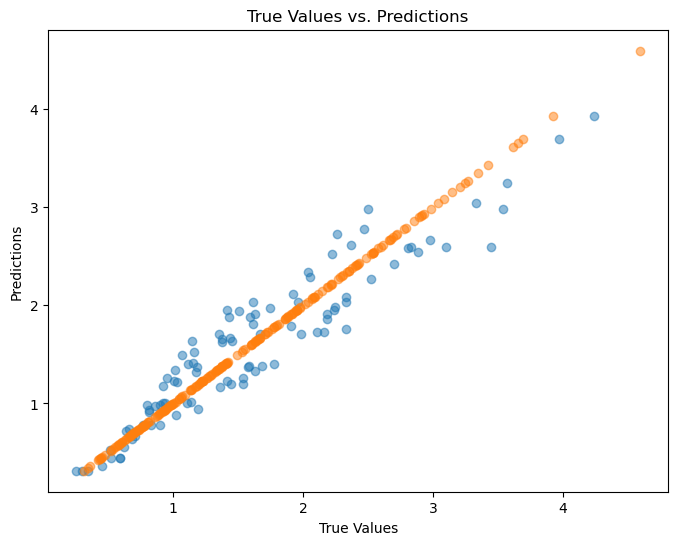

In [22]:
# 对数据进行相应的可视化操作
plt.figure(figsize=(8, 6))  # 设置图形大小
# 绘制散点图
plt.scatter(y_test, y_test_pred, alpha=0.5)  # 绘制散点图，alpha参数控制点的透明度
plt.scatter(y_train, y_train_pred, alpha=0.5)  # 绘制散点图，alpha参数控制点的透明度
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')

# 绘制一条对角线，表示理想情况下预测值等于真实值
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# 显示图形
plt.show()